In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/Users/Shalini Maurya/Desktop/dataset/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
#before removing unwanted data we will make a copy
ds=df.copy()


In [13]:
ds=ds.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# EDA

In [15]:
ds.shape

(891, 8)

In [17]:
ds.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [16]:
#now lets check if there is any null value available
ds.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
#now we will see the data type of all the above mentioned column
ds.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [20]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [21]:
ds['Survived'].unique()

array([0, 1], dtype=int64)

In [22]:
ds['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
ds['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
ds.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


# Univariate Analysis

In [25]:
#first we will seperate numerical and categorical coulmns to visualize them
ds1=ds.drop(['Sex','Embarked'],axis=1)
ds1

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [26]:
ds2=ds[['Sex','Embarked']].copy()
ds2

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


<AxesSubplot:xlabel='Sex', ylabel='count'>

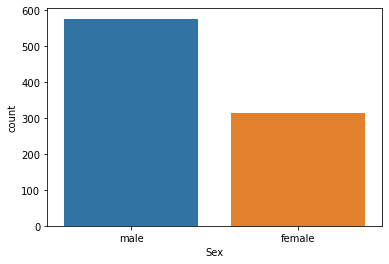

In [27]:
sns.countplot(x=ds2['Sex'],data=ds1)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

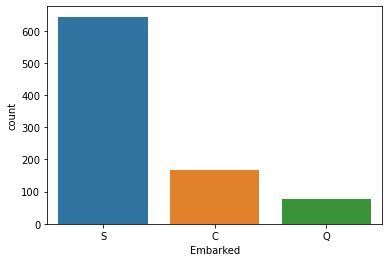

In [28]:
sns.countplot(x=ds2['Embarked'],data=ds1)

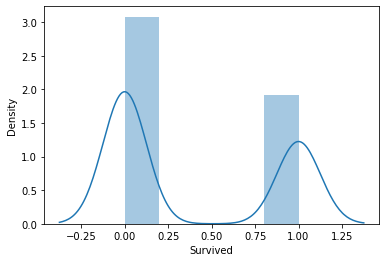

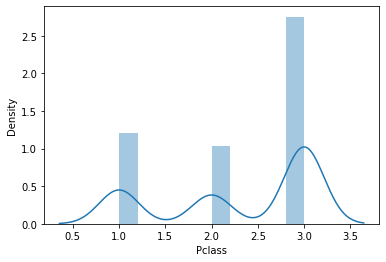

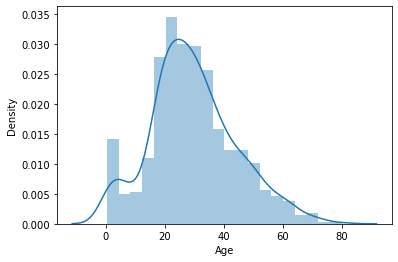

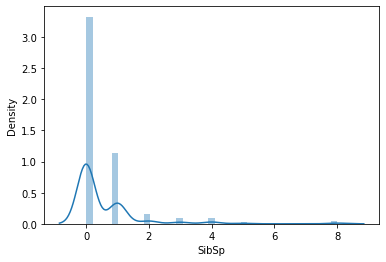

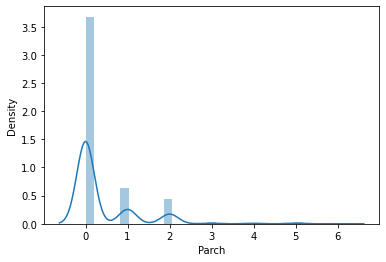

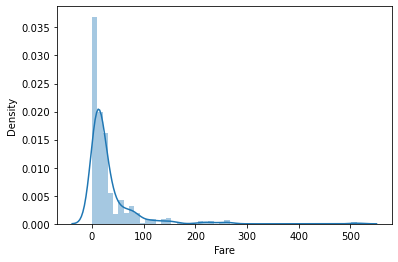

<Figure size 432x288 with 0 Axes>

In [30]:
for i in ds1.columns:
    sns.distplot(ds1[i])
    plt.figure()

# Bivariate Analysis

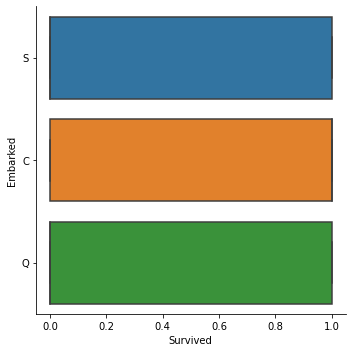

In [31]:
sns.catplot(data=ds,x='Survived',y='Embarked',kind='box')

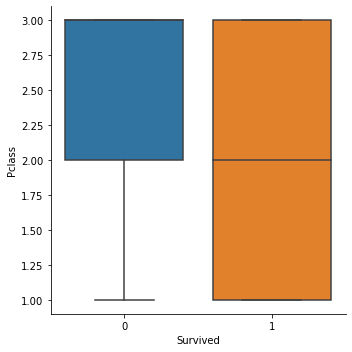

In [33]:
sns.catplot(data=ds,x='Survived',y='Pclass',kind='box')

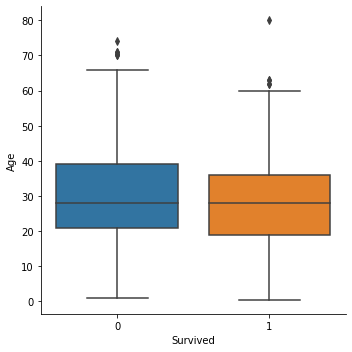

In [36]:
sns.catplot(data=ds,x='Survived',y='Age',kind='box')

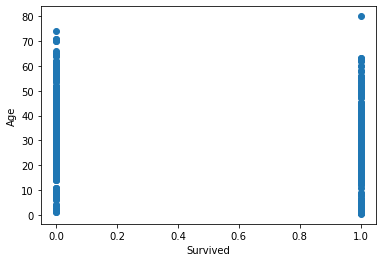

In [37]:
plt.scatter(ds['Survived'],ds['Age'])
plt.xlabel('Survived')
plt.ylabel("Age")
plt.show()

# Multivariate Analysis

In [38]:
ds.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Encoding of categorical columns

In [39]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()

In [45]:
ds['Sex']=le.fit_transform(ds['Sex'])
ds['Embarked']=le.fit_transform(ds['Embarked'])
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [46]:
ds.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000


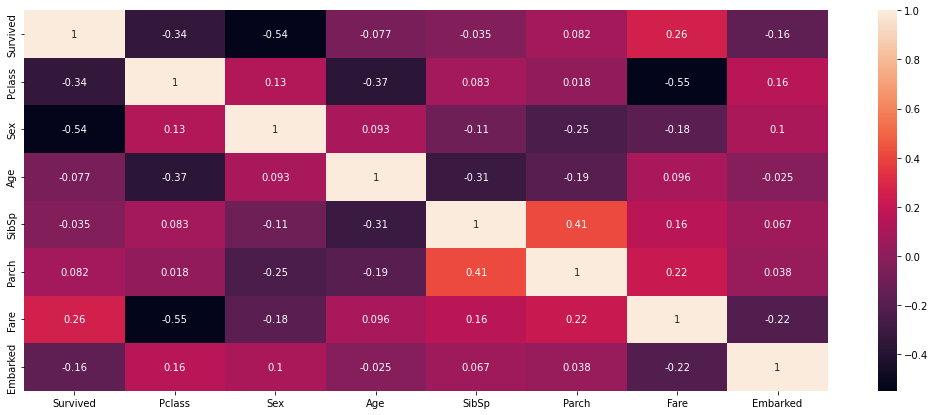

In [49]:
#Correlation using Heatmap
plt.figure(figsize=[18,7])
sns.heatmap(ds.corr(),annot=True)
plt.show()

# Replacing of null values

In [54]:
ds['Age'].fillna(ds['Age'].median(),inplace=True)
ds['Embarked'].fillna(ds['Embarked'].mode(),inplace=True)

In [55]:
#Again lets check if any null value present
ds.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Scaling of columns (Age and Fare)

In [57]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

In [62]:
ds['Age']=sd.fit_transform(ds['Age'].values.reshape(-1,1))
ds['Fare']=sd.fit_transform(ds['Fare'].values.reshape(-1,1))
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2
...,...,...,...,...,...,...,...,...
886,0,2,1,-0.181487,0,0,-0.386671,2
887,1,1,0,-0.796286,0,0,-0.044381,2
888,0,3,0,-0.104637,1,2,-0.176263,2
889,1,1,1,-0.258337,0,0,-0.044381,0


In [63]:
dt=ds.copy()

# Checking for outliers

<AxesSubplot:>

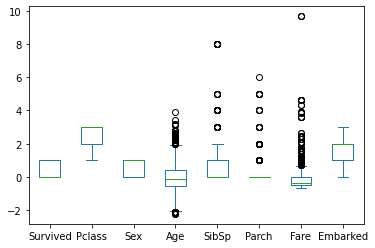

In [64]:
dt.plot.box()

# Removing outliers

In [67]:
from scipy.stats import zscore
z=np.abs(zscore(dt))


In [68]:
z

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.789272,0.827377,0.737695,0.565736,0.432793,0.473674,0.502445,0.581114
1,1.266990,1.566107,1.355574,0.663861,0.432793,0.473674,0.786845,1.938460
2,1.266990,0.827377,1.355574,0.258337,0.474545,0.473674,0.488854,0.581114
3,1.266990,1.566107,1.355574,0.433312,0.432793,0.473674,0.420730,0.581114
4,0.789272,0.827377,0.737695,0.433312,0.474545,0.473674,0.486337,0.581114
...,...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.737695,0.181487,0.474545,0.473674,0.386671,0.581114
887,1.266990,1.566107,1.355574,0.796286,0.474545,0.473674,0.044381,0.581114
888,0.789272,0.827377,1.355574,0.104637,0.432793,2.008933,0.176263,0.581114
889,1.266990,1.566107,0.737695,0.258337,0.474545,0.473674,0.044381,1.938460


In [71]:
dt=dt[(z<3).all(axis=1)]
dt.shape

(820, 8)

In [72]:
((891-820)/891)*100

7.968574635241302

# Checking for skewness

In [73]:
dt.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.257511
dtype: float64

In [74]:
from sklearn.preprocessing import PowerTransformer

In [78]:
list1=['SibSp','Parch','Fare']

pt=PowerTransformer(method='yeo-johnson',standardize=True)
for i in list1:
    dt[i]=pt.fit_transform(dt[i].values.reshape(-1,1))

In [79]:
dt.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       0.945773
Parch       1.581295
Fare        0.045415
Embarked   -1.257511
dtype: float64

In [80]:
list1=['SibSp','Parch','Fare']

pt=PowerTransformer(method='yeo-johnson',standardize=True)
for i in list1:
    dt[i]=pt.fit_transform(dt[i].values.reshape(-1,1))

In [81]:
dt.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       0.945698
Parch       1.581295
Fare       -0.070707
Embarked   -1.257511
dtype: float64

# Spliting the data into train and test

In [82]:
x=dt.drop('Survived',axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.565736,1.577136,-0.484706,-1.020018,2
1,1,0,0.663861,1.577136,-0.484706,1.453825,0
2,3,0,-0.258337,-0.633805,-0.484706,-0.894441,2
3,1,0,0.433312,1.577136,-0.484706,1.333411,2
4,3,1,0.433312,-0.633805,-0.484706,-0.871905,2
...,...,...,...,...,...,...,...
886,2,1,-0.181487,-0.633805,-0.484706,-0.140990,2
887,1,0,-0.796286,-0.633805,-0.484706,0.933884,2
888,3,0,-0.104637,1.577136,2.063133,0.672247,2
889,1,1,-0.258337,-0.633805,-0.484706,0.933884,0


In [83]:
y=dt['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

# Finding the best Random State

In [84]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc_sc=accuracy_score(y_test,pred)
    if acc_sc>maxacc:
        maxacc=acc_sc
        maxrs=i
print('best acc_sc is:',maxacc,' at random state', maxrs)

best acc_sc is: 0.861878453038674  at random state 14


In [85]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=148)

In [87]:
x_train.shape

(639, 7)

In [88]:
y_train.shape

(639,)

In [89]:
x_test.shape

(181, 7)

In [90]:
y_test.shape

(181,)

# Model Training

In [91]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()

In [94]:
model=(lg,dtc,svc,knn,rfc,ad)

for i in model:
    print("Model",i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('clasification_report',classification_report(y_test,pred))
    score=cross_val_score(i,x,y,cv=5)
    print(score.mean())

Model LogisticRegression()
accuracy_score 0.8066298342541437
confusion_matrix [[94 17]
 [18 52]]
clasification_report               precision    recall  f1-score   support

           0       0.84      0.85      0.84       111
           1       0.75      0.74      0.75        70

    accuracy                           0.81       181
   macro avg       0.80      0.79      0.80       181
weighted avg       0.81      0.81      0.81       181

0.7939024390243903
Model DecisionTreeClassifier()
accuracy_score 0.8453038674033149
confusion_matrix [[98 13]
 [15 55]]
clasification_report               precision    recall  f1-score   support

           0       0.87      0.88      0.88       111
           1       0.81      0.79      0.80        70

    accuracy                           0.85       181
   macro avg       0.84      0.83      0.84       181
weighted avg       0.84      0.85      0.84       181

0.7658536585365854
Model SVC()
accuracy_score 0.8287292817679558
confusion_matrix [[97 

# Hyper Parameter Tunning using GridSearchCV

In [95]:
# 1. FOR LOGISTIC REGRESSION

parameters={'C':np.arange(1,10),'penalty':['l1','l2','elasticnet']}
gs=GridSearchCV(lg,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [97]:
gs.best_params_

{'C': 1, 'penalty': 'l2'}

In [98]:
gs.best_score_

0.7949557086614173

In [102]:
# FOR DECISION TREE CLASSIFIER

parameters={'max_depth':np.arange(1,20),'criterion':['gini','entropy'],'splitter':['best','random'],
           'min_samples_leaf':np.arange(1,10),'min_samples_split':np.arange(1,10)}

gs=GridSearchCV(dtc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [103]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'splitter': 'random'}

In [104]:
gs.best_score_

0.8246555118110237

In [105]:
# FOR KNEIGHBORS CLASSIFIER

parameters={'n_neighbors':np.arange(1,10),'weights':['uniform','distance'],'n_jobs':[-1]}

gs=GridSearchCV(knn,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [106]:
gs.best_params_

{'n_jobs': -1, 'n_neighbors': 4, 'weights': 'uniform'}

In [107]:
gs.best_score_

0.7824311023622047

In [108]:
# FOR RANDOM FOREST CLASSIFIER

parameterS={'n_estimators':(100,150,200,250),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

gs=GridSearchCV(rfc,parameterS,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 200, 250)})

In [109]:
gs.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 250}

In [110]:
gs.best_score_

0.7964689960629922

In [112]:
# FOR SVC

parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[1.0,10.0],'probability':[True],'gamma':['scale','auto']}

gs=GridSearchCV(svc,parameters,cv=5)
gs.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'probability': [True]})

In [114]:
gs.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}

In [115]:
gs.best_score_

0.8137057086614174

In [116]:
# FOR ADABOOST CLASSIFIER

parameters={'n_estimators':[50,100,150,200],'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'algorithm':['SAMME','SAMME.R']}
gs=GridSearchCV(ad,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150, 200]})

In [117]:
gs.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}

In [118]:
gs.best_score_

0.7949557086614173

# Again Model Training

In [120]:
svc=SVC(kernel='rbf',probability=True,C=1.0,gamma='scale')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predsvc))
print('confusion_matrix',confusion_matrix(y_test,predsvc))
print('clasification_report',classification_report(y_test,predsvc))

accuracy_score 0.8287292817679558
confusion_matrix [[97 14]
 [17 53]]
clasification_report               precision    recall  f1-score   support

           0       0.85      0.87      0.86       111
           1       0.79      0.76      0.77        70

    accuracy                           0.83       181
   macro avg       0.82      0.82      0.82       181
weighted avg       0.83      0.83      0.83       181



In [122]:
lg=LogisticRegression(C=1,penalty='l2')
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predlg))
print('confusion_matrix',confusion_matrix(y_test,predlg))
print('clasification_report',classification_report(y_test,predlg))

accuracy_score 0.8066298342541437
confusion_matrix [[94 17]
 [18 52]]
clasification_report               precision    recall  f1-score   support

           0       0.84      0.85      0.84       111
           1       0.75      0.74      0.75        70

    accuracy                           0.81       181
   macro avg       0.80      0.79      0.80       181
weighted avg       0.81      0.81      0.81       181



In [123]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf=3,min_samples_split=5,splitter='random')
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('accuracy_score',accuracy_score(y_test,preddt))
print('confusion_matrix',confusion_matrix(y_test,preddt))
print('clasification_report',classification_report(y_test,preddt))

accuracy_score 0.7955801104972375
confusion_matrix [[94 17]
 [20 50]]
clasification_report               precision    recall  f1-score   support

           0       0.82      0.85      0.84       111
           1       0.75      0.71      0.73        70

    accuracy                           0.80       181
   macro avg       0.79      0.78      0.78       181
weighted avg       0.79      0.80      0.79       181



In [127]:
kn=KNeighborsClassifier(n_jobs=-1,n_neighbors=4,weights='uniform')
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predkn))
print('confusion_matrix',confusion_matrix(y_test,predkn))
print('clasification_report',classification_report(y_test,predkn))

accuracy_score 0.8011049723756906
confusion_matrix [[101  10]
 [ 26  44]]
clasification_report               precision    recall  f1-score   support

           0       0.80      0.91      0.85       111
           1       0.81      0.63      0.71        70

    accuracy                           0.80       181
   macro avg       0.81      0.77      0.78       181
weighted avg       0.80      0.80      0.79       181



In [128]:
rf=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=250)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predrf))
print('confusion_matrix',confusion_matrix(y_test,predrf))
print('clasification_report',classification_report(y_test,predrf))

accuracy_score 0.8453038674033149
confusion_matrix [[101  10]
 [ 18  52]]
clasification_report               precision    recall  f1-score   support

           0       0.85      0.91      0.88       111
           1       0.84      0.74      0.79        70

    accuracy                           0.85       181
   macro avg       0.84      0.83      0.83       181
weighted avg       0.84      0.85      0.84       181



In [130]:
ad=AdaBoostClassifier(algorithm='SAMME',learning_rate= 1.0,n_estimators=200)
ad.fit(x_test,y_test)
predad=ad.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predad))
print('confusion_matrix',confusion_matrix(y_test,predad))
print('clasification_report',classification_report(y_test,predad))

accuracy_score 0.8784530386740331
confusion_matrix [[97 14]
 [ 8 62]]
clasification_report               precision    recall  f1-score   support

           0       0.92      0.87      0.90       111
           1       0.82      0.89      0.85        70

    accuracy                           0.88       181
   macro avg       0.87      0.88      0.87       181
weighted avg       0.88      0.88      0.88       181



# AUC ROC CURVE AND SCORE

In [132]:
from sklearn.metrics import roc_auc_score,roc_curve,f1_score

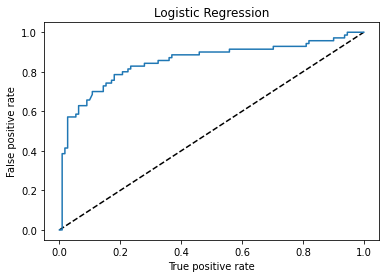

In [133]:
# FOR LOGISTIC REGRESSION

pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Logistic Regression')
plt.show()

In [134]:
auc_score=roc_auc_score(y_test,predlg)
auc_score

0.7948519948519949

In [135]:
print(f1_score(y_test,predlg))

0.748201438848921


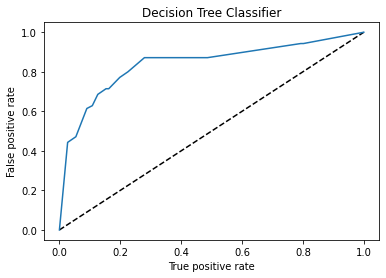

In [136]:
# FOR DECISION TREE CLASSIFIER

pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Decision Tree Classifier')
plt.show()

In [137]:
auc_score=roc_auc_score(y_test,preddt)
auc_score

0.7805662805662806

In [138]:
print(f1_score(y_test,preddt))

0.7299270072992701


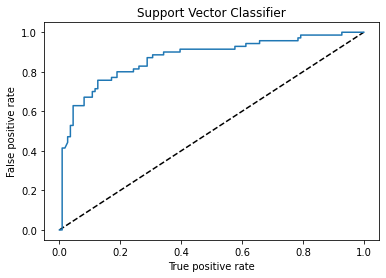

In [141]:
# FOR SVC

pred_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Support Vector Classifier')
plt.show()

In [142]:
auc_score=roc_auc_score(y_test,predsvc)
auc_score

0.8155083655083654

In [143]:
print(f1_score(y_test,predsvc))

0.7737226277372262


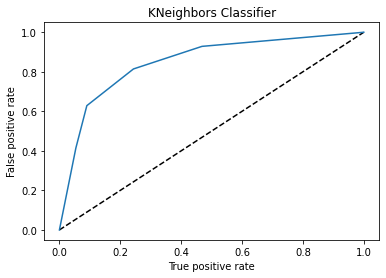

In [146]:
# FOR KNEIGHBORS CLASSIFIER

pred_prob=kn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('KNeighbors Classifier')
plt.show()

In [147]:
auc_score=roc_auc_score(y_test,predkn)
auc_score

0.7692406692406693

In [148]:
print(f1_score(y_test,predkn))

0.7096774193548386


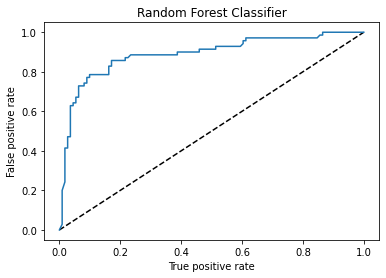

In [152]:
# RANDOM FOREST CLASSIFIER

pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [153]:
auc_score=roc_auc_score(y_test,predrf)
auc_score

0.8263835263835264

In [154]:
print(f1_score(y_test,predrf))

0.787878787878788


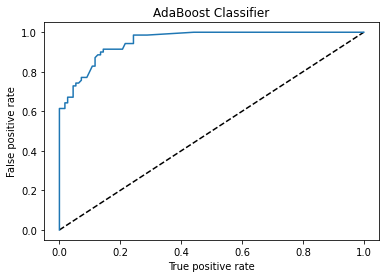

In [157]:
# ADABOOST CLASSIFIER

pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [158]:
auc_score=roc_auc_score(y_test,predad)
auc_score

0.8797940797940798

In [159]:
print(f1_score(y_test,predad))

0.8493150684931505


# Final Model

In [160]:
ad=AdaBoostClassifier(algorithm='SAMME',learning_rate= 1.0,n_estimators=200)
ad.fit(x_test,y_test)
predad=ad.predict(x_test)
print(f1_score(y_test,predad))

0.8493150684931505


# Saving the Final Model

In [161]:
import joblib

In [162]:
joblib.dump(ad,'titanic_ad.obj')

['titanic_ad.obj']